In [4]:
import numpy as np
import random
random.seed(4)
np.random.seed(4)
import matplotlib.pyplot as plt

In [5]:


def random_argmax_batch(Q, rngs): 
    n_bandits = Q.shape[0]
    actions = np.empty(n_bandits, dtype=int)
    for i in range(n_bandits):
        max_value = np.max(Q[i])
        candidates = np.flatnonzero(Q[i] == max_value)
        actions[i] = rngs[i].choice(candidates)
    return actions


def epsilon_greedy(n_bandits, n_steps, epsilon, true_means, initial_values):

    n_arms = len(true_means)
    reward_means = np.tile(true_means, (n_bandits, 1))
    Q = np.tile(initial_values, (n_bandits, 1))
    counts = np.zeros((n_bandits, n_arms))
    rewards_per_step = np.zeros((n_bandits, n_steps))
    percent_optimal = np.zeros(n_steps)
    optimal_arm = np.argmax(true_means)

    #separate random generator for each simulation
    base_rng = np.random.default_rng(4)
    seeds = base_rng.integers(0, 1000000, size=n_bandits)
    rngs = [np.random.default_rng(s) for s in seeds]

    for t in range(n_steps):
        greedy_actions = random_argmax_batch(Q, rngs)
        explore = np.array([rngs[i].random() < epsilon for i in range(n_bandits)])
        random_actions = np.array([rngs[i].integers(0, n_arms) for i in range(n_bandits)])
        actions = np.where(explore, random_actions, greedy_actions)

        correct = actions == optimal_arm
        percent_optimal[t] = correct.mean()

        rewards = np.array([
            rngs[i].normal(loc=reward_means[i, actions[i]])
            for i in range(n_bandits)])
        rewards_per_step[:, t] = rewards

        counts[np.arange(n_bandits), actions] += 1
        Q[np.arange(n_bandits), actions] += ( rewards - Q[np.arange(n_bandits), actions]) / counts[np.arange(n_bandits), actions]

    return Q, counts, rewards_per_step, percent_optimal


In [6]:
true_means = np.random.normal(loc=0.0, scale=1.0, size=10)
np.random.seed(4)
print(true_means)

[ 0.05056171  0.49995133 -0.99590893  0.69359851 -0.41830152 -1.58457724
 -0.64770677  0.59857517  0.33225003 -1.14747663]


In [7]:
initial_values=np.zeros(10)
_,_,rewards_per_step_greedy,percent_optimal_greedy=epsilon_greedy(1000,2000,0,true_means,initial_values)


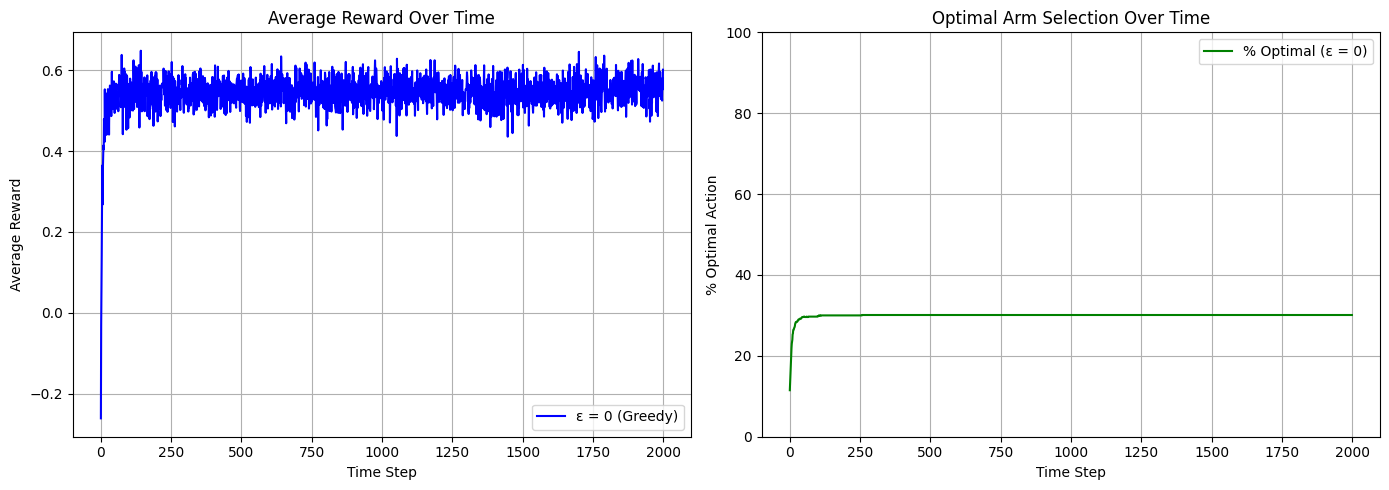

In [8]:

avg_reward_greedy = rewards_per_step_greedy.mean(axis=0)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_reward_greedy, label="ε = 0 (Greedy)", color='blue')
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(percent_optimal_greedy*100, label="% Optimal (ε = 0)", color='green')
plt.xlabel("Time Step")
plt.ylabel("% Optimal Action")
plt.title("Optimal Arm Selection Over Time")
plt.ylim(0, 100)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


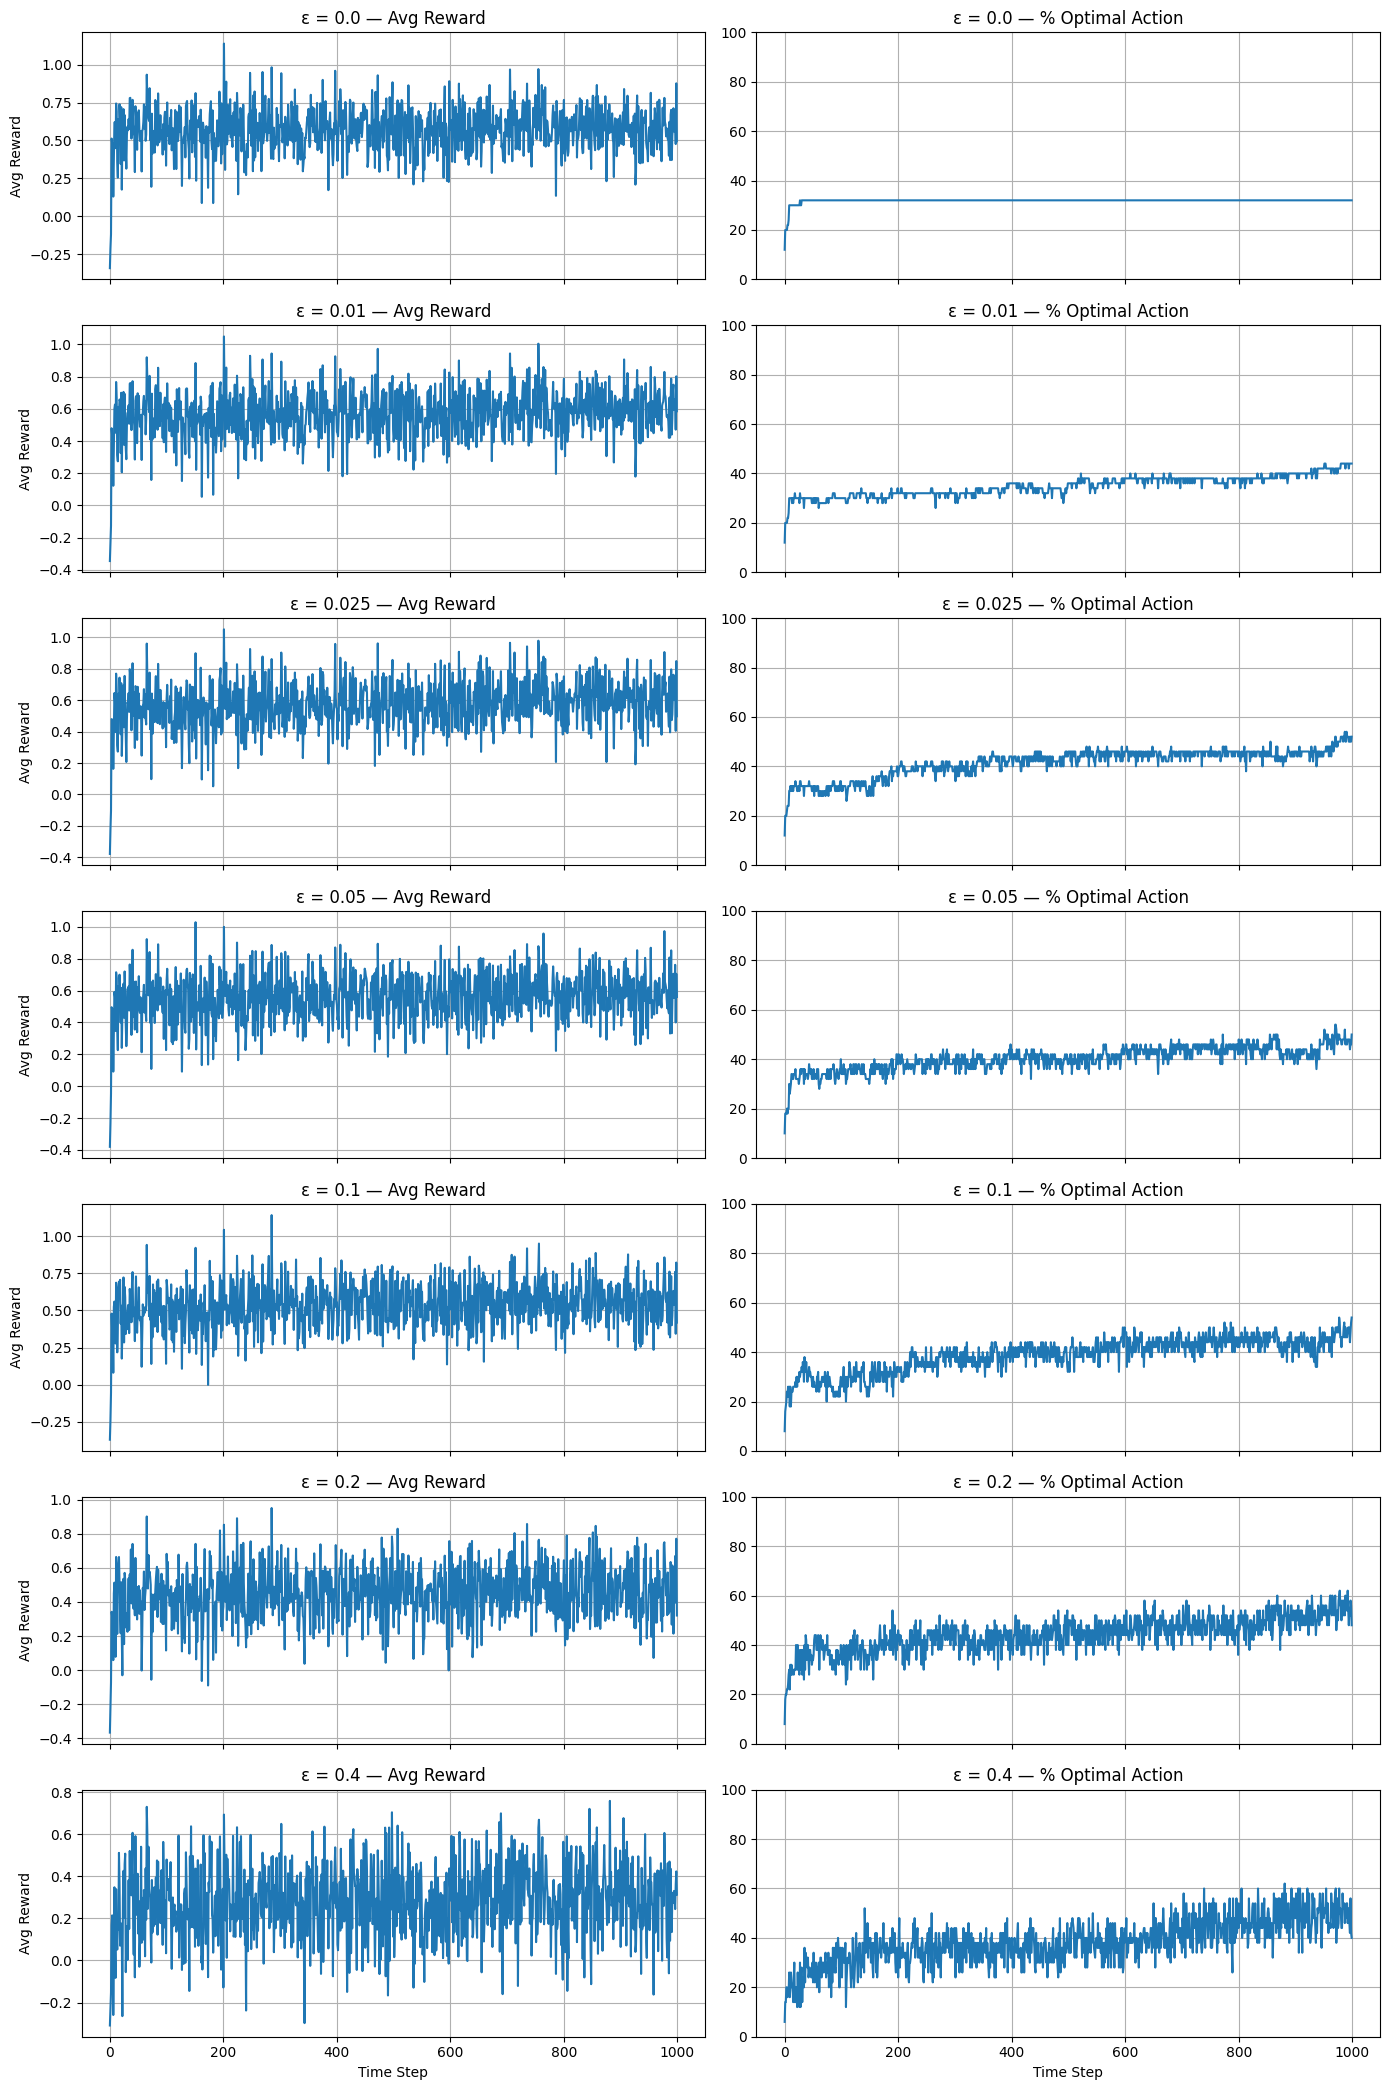

In [9]:

epsilon_values = [0.0, 0.01, 0.025, 0.05, 0.1, 0.2, 0.4]

all_avg_rewards = []
all_percent_optimal = []



for eps in epsilon_values:
    Q, counts, rewards_per_step, percent_opt = epsilon_greedy(50, 1000, eps, true_means, np.zeros(10))
    avg_reward = rewards_per_step.mean(axis=0)
    all_avg_rewards.append(avg_reward)
    all_percent_optimal.append(percent_opt * 100)  

n_eps = len(epsilon_values)
fig, axes = plt.subplots(n_eps, 2, figsize=(14, 3 * n_eps), sharex=True)

for i, eps in enumerate(epsilon_values):
    axes[i, 0].plot(all_avg_rewards[i])
    axes[i, 0].set_title(f"ε = {eps} — Avg Reward")
    axes[i, 0].set_ylabel("Avg Reward")
    axes[i, 0].grid(True)

    axes[i, 1].plot(all_percent_optimal[i])
    axes[i, 1].set_title(f"ε = {eps} — % Optimal Action")
    axes[i, 1].set_ylim(0, 100)
    axes[i, 1].grid(True)

axes[-1, 0].set_xlabel("Time Step")
axes[-1, 1].set_xlabel("Time Step")

plt.tight_layout()
plt.show()


In [10]:

_,_,rewards_per_step_eps,percent_optimal_eps=epsilon_greedy(1000,2000,0.1,true_means,initial_values)


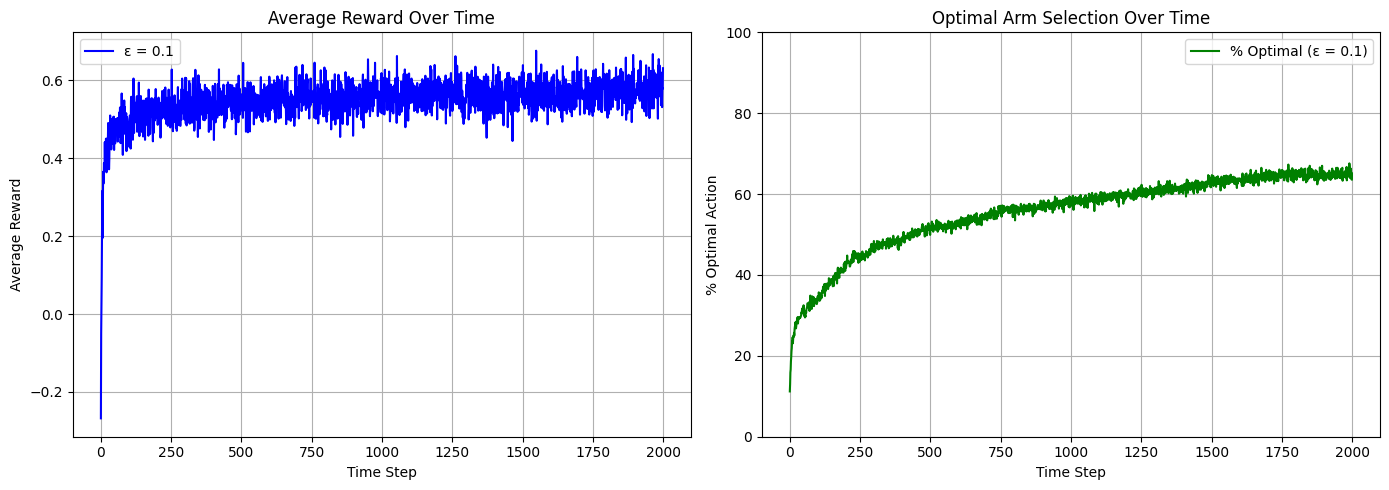

In [11]:

avg_reward_greedy_eps = rewards_per_step_eps.mean(axis=0)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_reward_greedy_eps, label="ε = 0.1", color='blue')
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(percent_optimal_eps*100, label="% Optimal (ε = 0.1)", color='green')
plt.xlabel("Time Step")
plt.ylabel("% Optimal Action")
plt.title("Optimal Arm Selection Over Time")
plt.ylim(0, 100)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
np.random.seed(4)
optimistic_initial_values = np.full(10, np.percentile(np.random.normal(0, 1, 10), 99.5))
_,_,rewards_per_step_optimal,percent_optimal_optimal=epsilon_greedy(1000,2000,0,true_means,optimistic_initial_values)

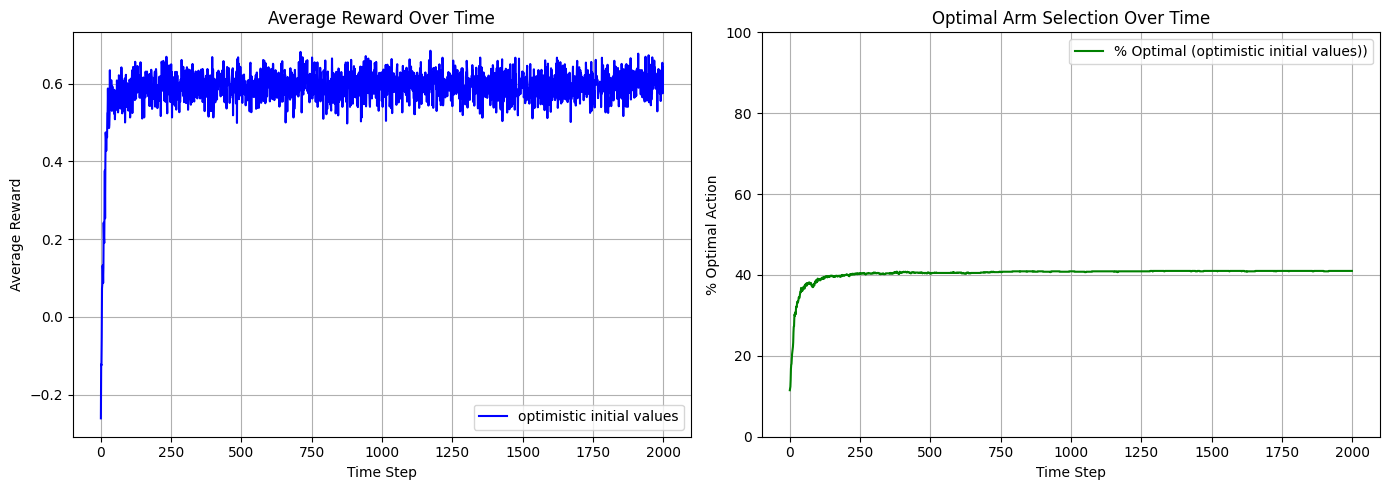

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

avg_reward_optimal = rewards_per_step_optimal.mean(axis=0)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_reward_optimal, label="optimistic initial values", color='blue')
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time")
plt.grid(True)
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(percent_optimal_optimal*100, label="% Optimal (optimistic initial values))", color='green')
plt.xlabel("Time Step")
plt.ylabel("% Optimal Action")
plt.title("Optimal Arm Selection Over Time")
plt.ylim(0, 100)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [16]:
def gradient_bandit(n_bandits, n_steps, alpha, true_means):
    n_arms = len(true_means)
    reward_means = np.tile(true_means, (n_bandits, 1))

  
    base_rng = np.random.default_rng(4)
    seeds = base_rng.integers(0, 100000, size=n_bandits)
    rngs = [np.random.default_rng(s) for s in seeds]

    H = np.zeros((n_bandits, n_arms))          
    avg_rewards = np.zeros(n_bandits)           
    rewards_per_step = np.zeros((n_bandits, n_steps))
    percent_optimal = np.zeros(n_steps)

    optimal_arm = np.argmax(true_means)

    for t in range(n_steps):
        exp_H = np.exp(H - H.max(axis=1, keepdims=True))  
        probs = exp_H / exp_H.sum(axis=1, keepdims=True)

        actions = np.array([rngs[i].choice(n_arms, p=probs[i]) for i in range(n_bandits)])
        rewards = np.array([rngs[i].normal(loc=reward_means[i, actions[i]]) for i in range(n_bandits)])
        rewards_per_step[:, t] = rewards

        percent_optimal[t] = np.mean(actions == optimal_arm)

        for i in range(n_bandits):
            avg_rewards[i] += (rewards[i] - avg_rewards[i]) / (t + 1)

            one = np.zeros(n_arms)
            one[actions[i]] = 1
            H[i] += alpha * (rewards[i] - avg_rewards[i]) * (one - probs[i])

    return H, rewards_per_step, percent_optimal


In [17]:
_,rewards_gradient,percent_optimal_gradient=gradient_bandit(1000,2000,0.1,true_means)


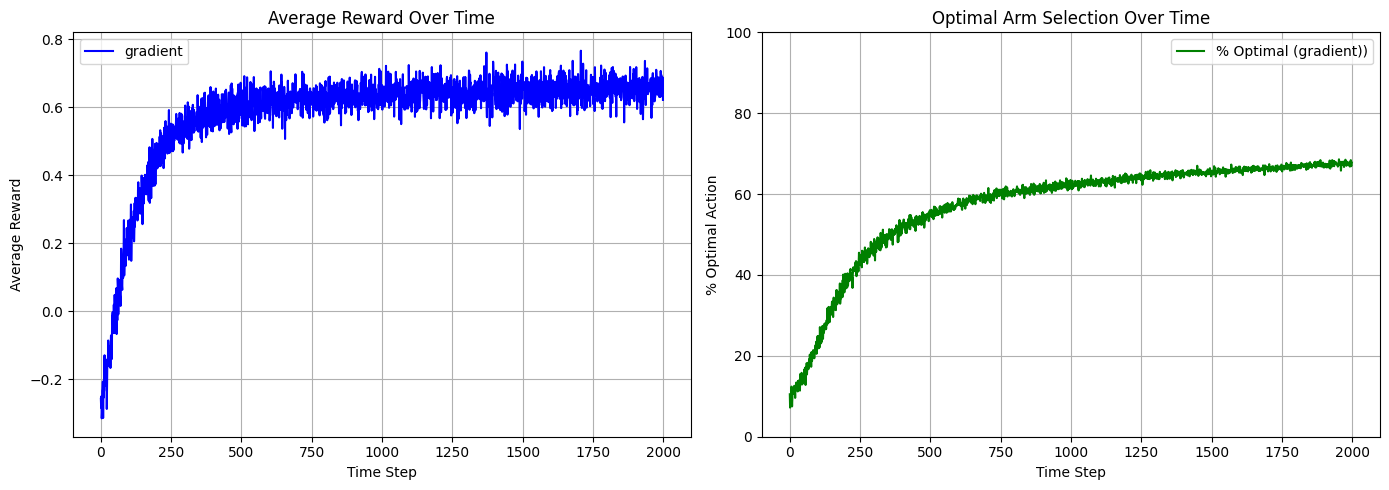

In [18]:
avg_reward_gradient = rewards_gradient.mean(axis=0)

# Plot side-by-side: average reward and % optimal
plt.figure(figsize=(14, 5))

# Average Reward Plot
plt.subplot(1, 2, 1)
plt.plot(avg_reward_gradient, label="gradient", color='blue')
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time")
plt.grid(True)
plt.legend()

# % Optimal Action Plot
plt.subplot(1, 2, 2)
plt.plot(percent_optimal_gradient*100, label="% Optimal (gradient))", color='green')
plt.xlabel("Time Step")
plt.ylabel("% Optimal Action")
plt.title("Optimal Arm Selection Over Time")
plt.ylim(0, 100)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

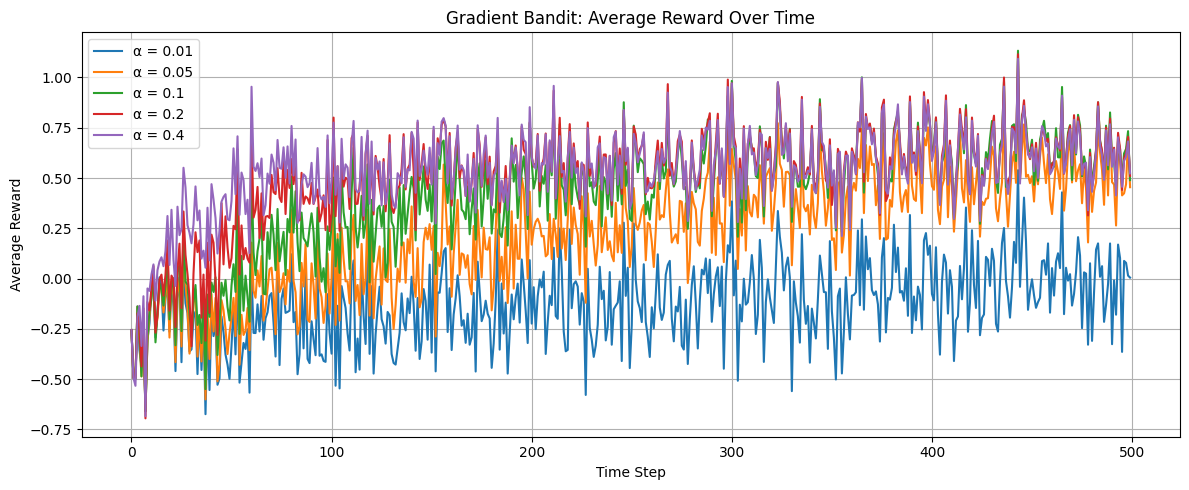

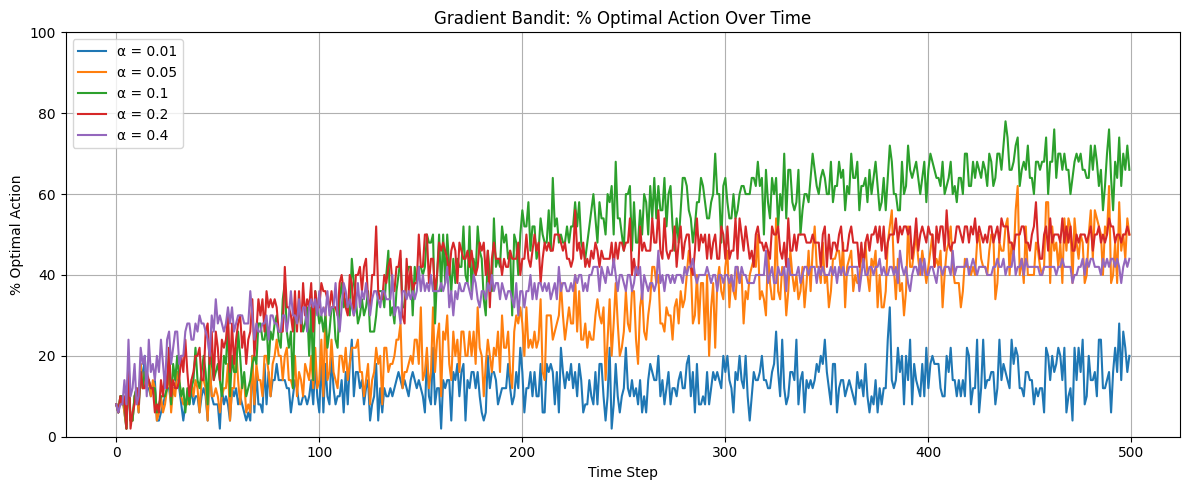

In [19]:

alpha_values = [0.01, 0.05, 0.1, 0.2, 0.4]

all_avg_rewards = []
all_percent_optimal = []

for alpha in alpha_values:
    _, rewards_per_step, percent_optimal = gradient_bandit(n_bandits=50,n_steps=500,alpha=alpha,true_means=true_means)
    avg_reward = rewards_per_step.mean(axis=0)
    all_avg_rewards.append(avg_reward)
    all_percent_optimal.append(percent_optimal)

plt.figure(figsize=(12, 5))
for i, alpha in enumerate(alpha_values):
    plt.plot(all_avg_rewards[i], label=f"α = {alpha}")
plt.title("Gradient Bandit: Average Reward Over Time")
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
for i, alpha in enumerate(alpha_values):
    plt.plot(all_percent_optimal[i] * 100, label=f"α = {alpha}")
plt.title("Gradient Bandit: % Optimal Action Over Time")
plt.xlabel("Time Step")
plt.ylabel("% Optimal Action")
plt.ylim(0, 100)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
import numpy as np

def epsilon_greedy_change(n_bandits, n_steps, epsilon, true_means, initial_values, mode="drift"):

    n_arms = len(true_means)
    Q = np.tile(initial_values, (n_bandits, 1))
    counts = np.zeros((n_bandits, n_arms))
    rewards_per_step = np.zeros((n_bandits, n_steps))
    percent_optimal = np.zeros(n_steps)

    current_means = np.tile(true_means, (n_bandits, 1)).copy()

    base_rng = np.random.default_rng(4)
    seeds = base_rng.integers(0, 1e6, size=n_arms)
    rngs = [np.random.default_rng(seed) for seed in seeds]

    for t in range(n_steps):
        greedy_actions = np.empty(n_bandits, dtype=int)
        for i in range(n_bandits):
            max_val = np.max(Q[i])
            best_arms = np.flatnonzero(Q[i] == max_val)
            greedy_actions[i] = np.random.choice(best_arms)

        explore = np.random.rand(n_bandits) < epsilon
        random_actions = np.random.randint(0, n_arms, size=n_bandits)
        actions = np.where(explore, random_actions, greedy_actions)

        optimal_arms = np.argmax(current_means, axis=1)
        percent_optimal[t] = np.mean(actions == optimal_arms)

        rewards = np.random.normal(loc=current_means[np.arange(n_bandits), actions])
        rewards_per_step[:, t] = rewards

        counts[np.arange(n_bandits), actions] += 1
        alpha = 1 / counts[np.arange(n_bandits), actions]
        Q[np.arange(n_bandits), actions] += alpha * (rewards - Q[np.arange(n_bandits), actions])

        if mode == "drift":
            drift = np.vstack([
                rngs[i].normal(0, 0.01, size=n_bandits) for i in range(n_arms)
            ]).T
            current_means += drift

        elif mode == "mean-reverting":
            theta = 0.05  # speed of mean reversion
            mean_baseline = np.tile(true_means, (n_bandits, 1))
            noise = np.vstack([
                rngs[i].normal(0, 0.01, size=n_bandits) for i in range(n_arms)
            ]).T
            current_means += theta * (mean_baseline - current_means) + noise

    return current_means, Q, rewards_per_step, percent_optimal


In [21]:

current_means,_,rewards_epsgreedy_drift,percent_optimal_epsgreedy_drift=epsilon_greedy_change(1000,2000,0.1,true_means,np.zeros(10))


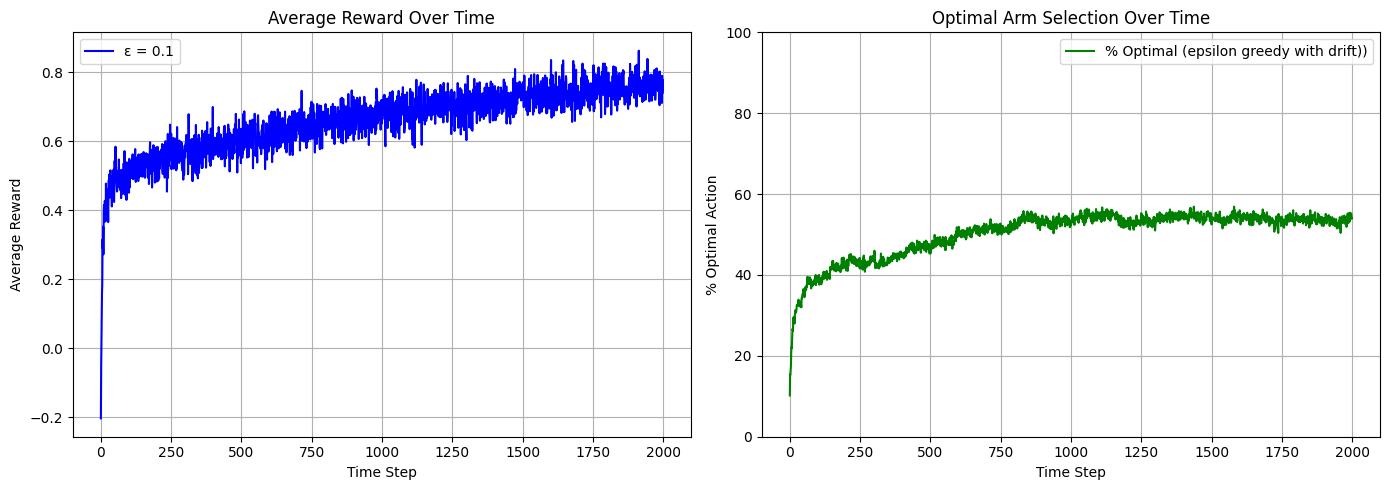

In [22]:
avg_reward_epsgreedy_drift = rewards_epsgreedy_drift.mean(axis=0)

# Plot side-by-side: average reward and % optimal
plt.figure(figsize=(14, 5))

# Average Reward Plot
plt.subplot(1, 2, 1)
plt.plot(avg_reward_epsgreedy_drift, label="ε = 0.1", color='blue')
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time")
plt.grid(True)

plt.legend()
plt.subplot(1, 2, 2)
plt.plot(percent_optimal_epsgreedy_drift*100, label="% Optimal (epsilon greedy with drift))", color='green')
plt.xlabel("Time Step")
plt.ylabel("% Optimal Action")
plt.title("Optimal Arm Selection Over Time")
plt.ylim(0, 100)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [203]:
np.max(current_means)

2.2252751411531704

In [ ]:

def gradient_change(n_bandits, n_steps, alpha, true_means, mode="drift"):
    
    n_arms = len(true_means)
    H = np.zeros((n_bandits, n_arms))           # Preferences
    avg_rewards = np.zeros(n_bandits)           # Baseline per bandit
    rewards_per_step = np.zeros((n_bandits, n_steps))
    percent_optimal = np.zeros(n_steps)

    current_means = np.tile(true_means, (n_bandits, 1)).copy()

    base_rng = np.random.default_rng(4)
    arm_seeds = base_rng.integers(0, 1e6, size=n_arms)
    arm_rngs = [np.random.default_rng(seed) for seed in arm_seeds]

    bandit_seeds = base_rng.integers(0, 1e6, size=n_bandits)
    bandit_rngs = [np.random.default_rng(seed) for seed in bandit_seeds]

    for t in range(n_steps):
        exp_H = np.exp(H - H.max(axis=1, keepdims=True))
        probs = exp_H / exp_H.sum(axis=1, keepdims=True)

        actions = np.array([bandit_rngs[i].choice(n_arms, p=probs[i]) for i in range(n_bandits)])
        rewards = np.array([bandit_rngs[i].normal(loc=current_means[i, actions[i]]) for i in range(n_bandits)])
        rewards_per_step[:, t] = rewards

        optimal_arms = np.argmax(current_means, axis=1)
        percent_optimal[t] = np.mean(actions == optimal_arms)

        for i in range(n_bandits):
            avg_rewards[i] += (rewards[i] - avg_rewards[i]) / (t + 1)
            one = np.zeros(n_arms)
            one[actions[i]] = 1
            H[i] += alpha * (rewards[i] - avg_rewards[i]) * (one - probs[i])

        if mode == "drift":
            drift = np.vstack([arm_rngs[i].normal(0, 0.01, size=n_bandits) for i in range(n_arms)]).T
            current_means += drift

        elif mode == "mean-reverting":
            theta = 0.05
            mean_baseline = np.tile(true_means, (n_bandits, 1))
            noise = np.vstack([arm_rngs[i].normal(0, 0.01, size=n_bandits) for i in range(n_arms)]).T
            current_means += theta * (mean_baseline - current_means) + noise

    return current_means, H, rewards_per_step, percent_optimal


In [24]:
current_means,_,rewards_gradient_drift,percent_optimal_gradient_drift=gradient_change(1000,2000,0.1,true_means)

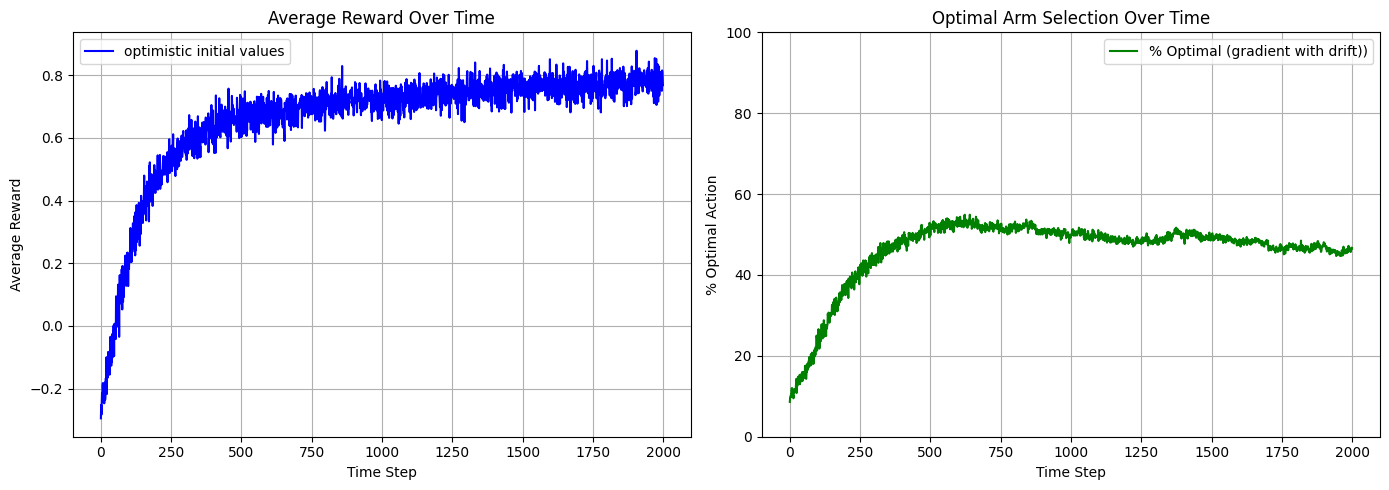

In [25]:
avg_reward_gradient_drift= rewards_gradient_drift.mean(axis=0)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_reward_gradient_drift, label="optimistic initial values", color='blue')
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(percent_optimal_gradient_drift*100, label="% Optimal (gradient with drift))", color='green')
plt.xlabel("Time Step")
plt.ylabel("% Optimal Action")
plt.title("Optimal Arm Selection Over Time")
plt.ylim(0, 100)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [26]:
np.max(current_means)

2.2252751411531704

In [27]:
current_means,_,rewards_greedy_revert,percent_greedy_revert=epsilon_greedy_change(1000,2000,0.1,true_means,np.zeros(10),"mean-reverting")

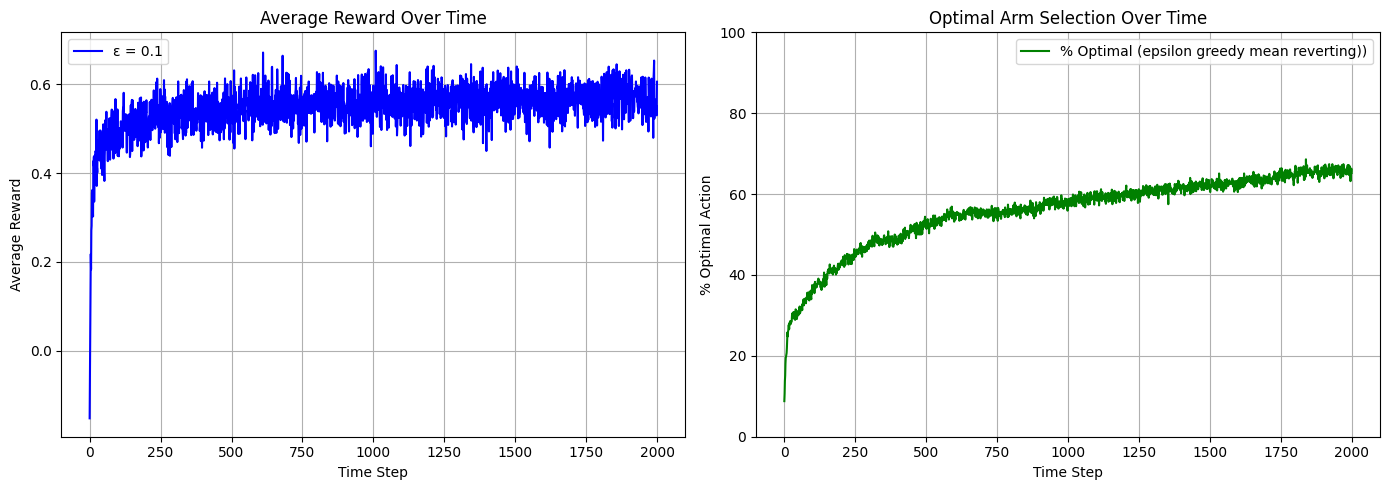

In [28]:
avg_reward_epsgreedy_revert = rewards_greedy_revert.mean(axis=0)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_reward_epsgreedy_revert, label="ε = 0.1", color='blue')
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time")
plt.grid(True)

plt.legend()
plt.subplot(1, 2, 2)
plt.plot(percent_greedy_revert*100, label="% Optimal (epsilon greedy mean reverting))", color='green')
plt.xlabel("Time Step")
plt.ylabel("% Optimal Action")
plt.title("Optimal Arm Selection Over Time")
plt.ylim(0, 100)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [215]:
np.max(current_means)

0.7919113576619202

In [29]:
current_means,_,rewards_gradient_revert,percent_gradient_revert=gradient_change(1000,2000,0.1,true_means,"mean-reverting")

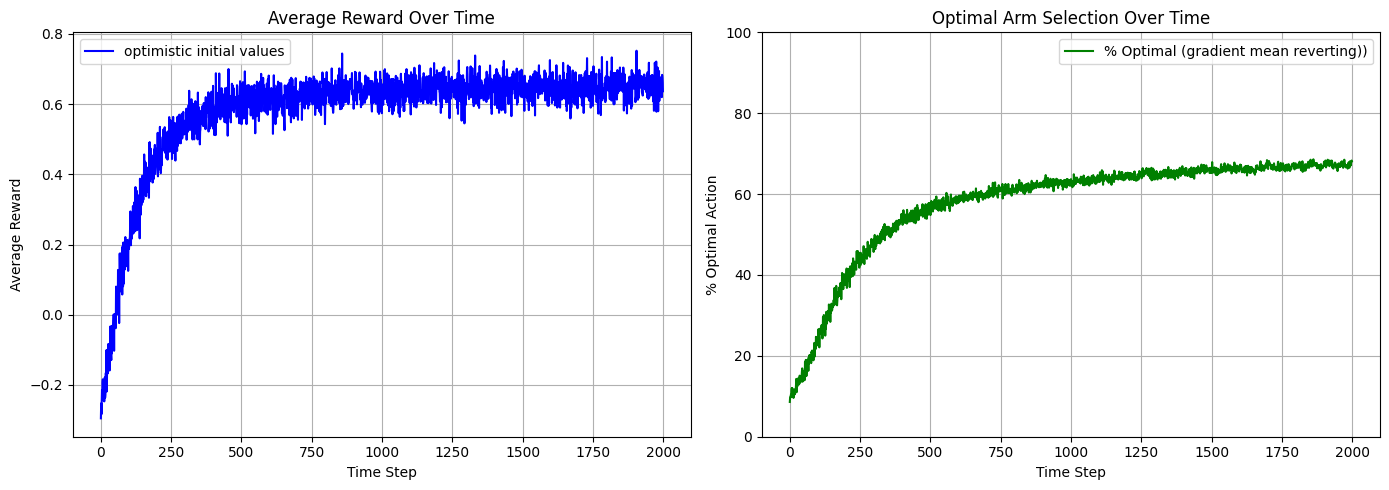

In [30]:
avg_reward_gradient_revert= rewards_gradient_revert.mean(axis=0)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_reward_gradient_revert, label="optimistic initial values", color='blue')
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(percent_gradient_revert*100, label="% Optimal (gradient mean reverting))", color='green')
plt.xlabel("Time Step")
plt.ylabel("% Optimal Action")
plt.title("Optimal Arm Selection Over Time")
plt.ylim(0, 100)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

def greedy_abrupt(n_bandits, n_steps, epsilon, true_means, initial_values, mode="no-reset"):

    n_arms = len(true_means)
    Q = np.tile(initial_values, (n_bandits, 1))
    counts = np.zeros((n_bandits, n_arms))
    rewards_per_step = np.zeros((n_bandits, n_steps))
    percent_optimal = np.zeros(n_steps)
    
    current_means = np.tile(true_means, (n_bandits, 1)).copy()

    rng = np.random.default_rng(4)  # fixed seed
    perm = rng.permutation(n_arms)

    for t in range(n_steps):
        greedy_actions = np.empty(n_bandits, dtype=int)
        for i in range(n_bandits):
            max_val = np.max(Q[i])
            best_arms = np.flatnonzero(Q[i] == max_val)
            greedy_actions[i] = np.random.choice(best_arms)

        explore = np.random.rand(n_bandits) < epsilon
        random_actions = np.random.randint(0, n_arms, size=n_bandits)
        actions = np.where(explore, random_actions, greedy_actions)

        optimal_arms = np.argmax(current_means, axis=1)
        percent_optimal[t] = np.mean(actions == optimal_arms)

        rewards = np.random.normal(loc=current_means[np.arange(n_bandits), actions])
        rewards_per_step[:, t] = rewards

        counts[np.arange(n_bandits), actions] += 1
        alpha = 1 / counts[np.arange(n_bandits), actions]
        Q[np.arange(n_bandits), actions] += alpha * (rewards - Q[np.arange(n_bandits), actions])

       #abrupt change at t=501
        if t == 500:
            current_means = current_means[:, perm]  # permute arms
            if mode == "reset":
                Q = np.tile(initial_values, (n_bandits, 1))
                counts = np.zeros((n_bandits, n_arms))

    return current_means, Q, rewards_per_step, percent_optimal


In [32]:
_,_,rewards_greedy_permute,percent_greedy_permute=greedy_abrupt(1000,2000,0.1,true_means,np.zeros(10),"no-reset")

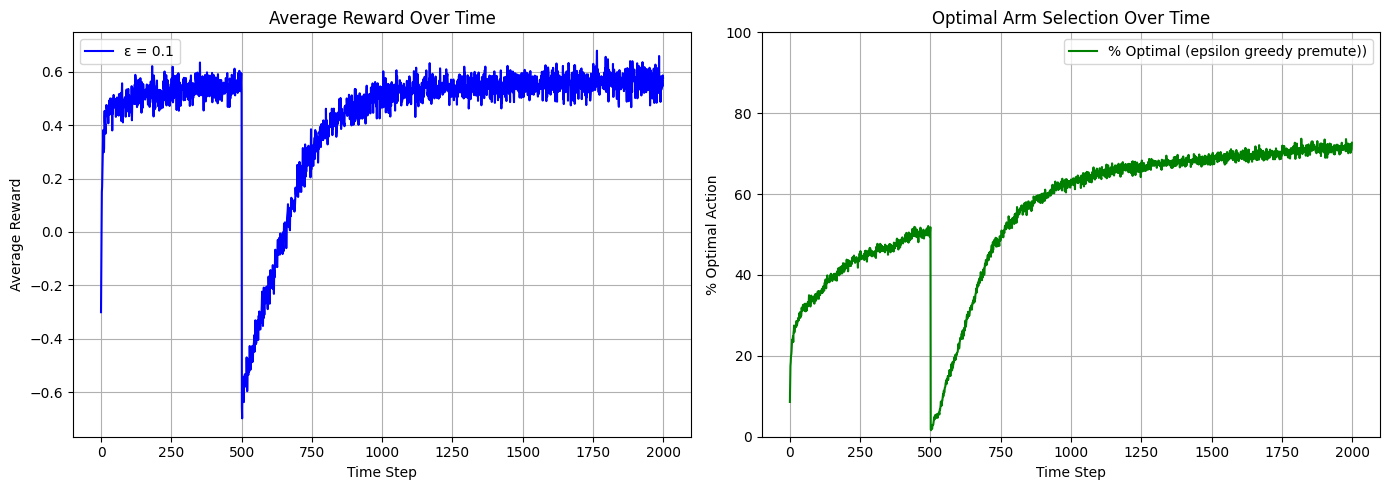

In [33]:
avg_reward_epsgreedy_permute = rewards_greedy_permute.mean(axis=0)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_reward_epsgreedy_permute, label="ε = 0.1", color='blue')
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time")
plt.grid(True)

plt.legend()
plt.subplot(1, 2, 2)
plt.plot(percent_greedy_permute*100, label="% Optimal (epsilon greedy premute))", color='green')
plt.xlabel("Time Step")
plt.ylabel("% Optimal Action")
plt.title("Optimal Arm Selection Over Time")
plt.ylim(0, 100)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [232]:
_,_,rewards_greedy_reset,percent_greedy_reset=greedy_abrupt(100,2000,0.1,true_means,np.zeros(10),"reset")

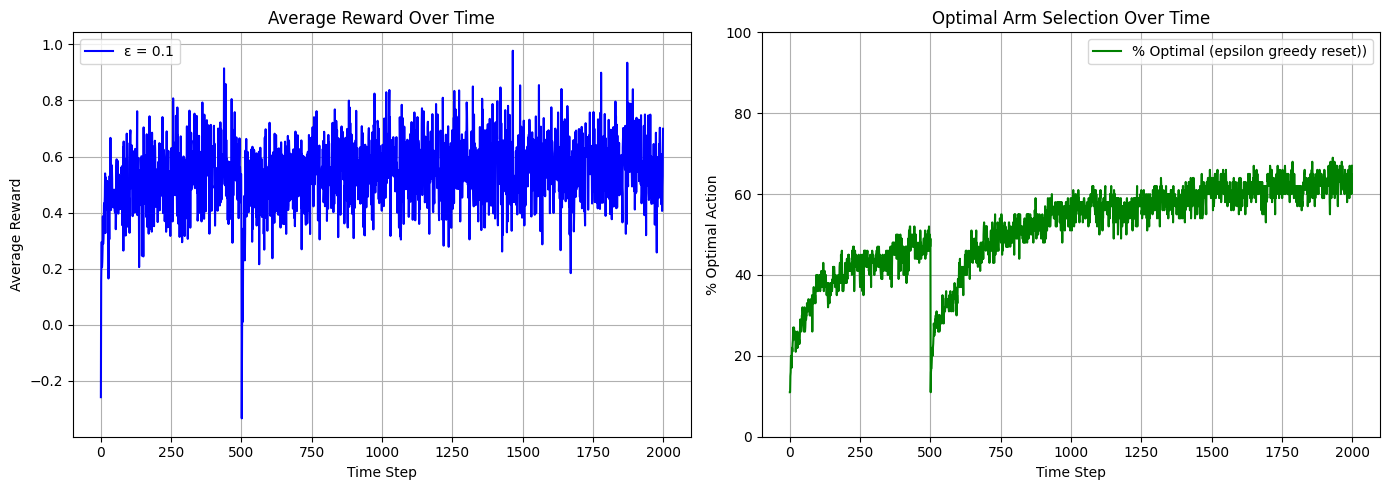

In [ ]:
avg_reward_epsgreedy_reset = rewards_greedy_reset.mean(axis=0)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_reward_epsgreedy_reset, label="ε = 0.1", color='blue')
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time")
plt.grid(True)

plt.legend()
plt.subplot(1, 2, 2)
plt.plot(percent_greedy_reset*100, label="% Optimal (epsilon greedy reset))", color='green')
plt.xlabel("Time Step")
plt.ylabel("% Optimal Action")
plt.title("Optimal Arm Selection Over Time")
plt.ylim(0, 100)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

def gradient_abrupt(n_bandits, n_steps, alpha, true_means, mode="no-reset"):

    n_arms = len(true_means)
    H = np.zeros((n_bandits, n_arms))           # preferences
    avg_rewards = np.zeros(n_bandits)           # baseline per bandit
    rewards_per_step = np.zeros((n_bandits, n_steps))
    percent_optimal = np.zeros(n_steps)

    current_means = np.tile(true_means, (n_bandits, 1)).copy()

    rng_perm = np.random.default_rng(123)
    permuted_indices = rng_perm.permutation(n_arms)

    base_rng = np.random.default_rng(4)
    bandit_seeds = base_rng.integers(0, 1e6, size=n_bandits)
    bandit_rngs = [np.random.default_rng(seed) for seed in bandit_seeds]

    for t in range(n_steps):
        if t == 501:
            current_means = current_means[:, permuted_indices]
            if mode == "reset":
                H[:] = 0
                avg_rewards[:] = 0

        exp_H = np.exp(H - H.max(axis=1, keepdims=True))
        probs = exp_H / exp_H.sum(axis=1, keepdims=True)

        actions = np.array([bandit_rngs[i].choice(n_arms, p=probs[i]) for i in range(n_bandits)])
        rewards = np.array([bandit_rngs[i].normal(loc=current_means[i, actions[i]]) for i in range(n_bandits)])
        rewards_per_step[:, t] = rewards
        optimal_arms = np.argmax(current_means, axis=1)
        percent_optimal[t] = np.mean(actions == optimal_arms)

        for i in range(n_bandits):
            avg_rewards[i] += (rewards[i] - avg_rewards[i]) / (t + 1)
            one = np.zeros(n_arms)
            one[actions[i]] = 1
            H[i] += alpha * (rewards[i] - avg_rewards[i]) * (one - probs[i])

    return current_means, H, rewards_per_step, percent_optimal


In [40]:
_,_,rewards_gradient_permute,percent_gradient_permute=gradient_abrupt(1000,2000,0.1,true_means,"no-reset")

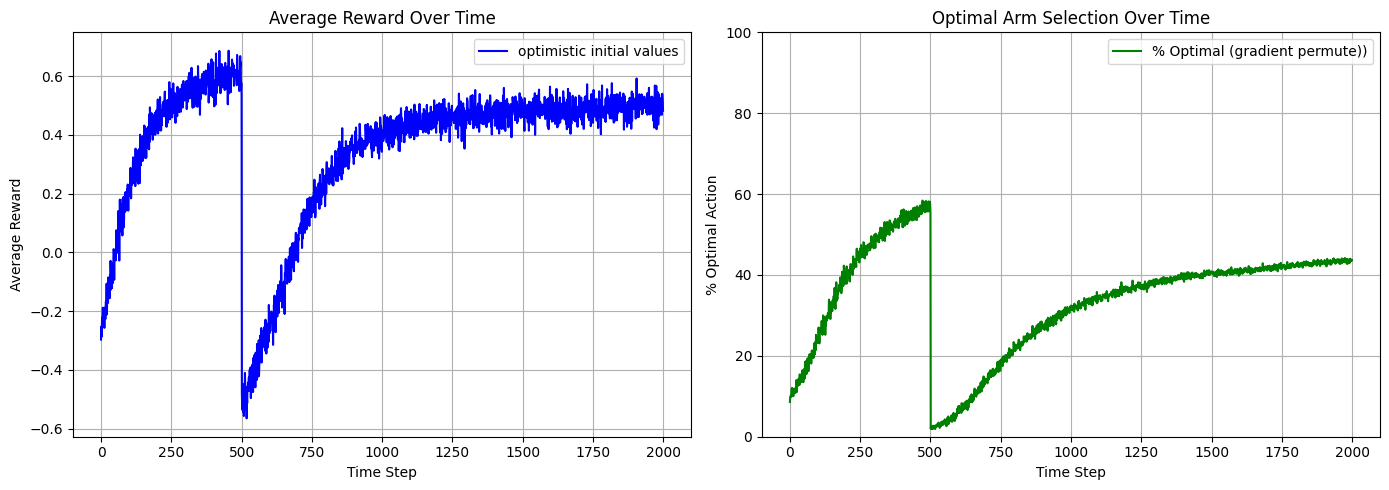

In [41]:
avg_reward_gradient_permute= rewards_gradient_permute.mean(axis=0)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_reward_gradient_permute, label="optimistic initial values", color='blue')
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(percent_gradient_permute*100, label="% Optimal (gradient permute))", color='green')
plt.xlabel("Time Step")
plt.ylabel("% Optimal Action")
plt.title("Optimal Arm Selection Over Time")
plt.ylim(0, 100)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [42]:
_,_,rewards_gradient_reset,percent_gradient_reset=gradient_abrupt(1000,2000,0.1,true_means,"reset")

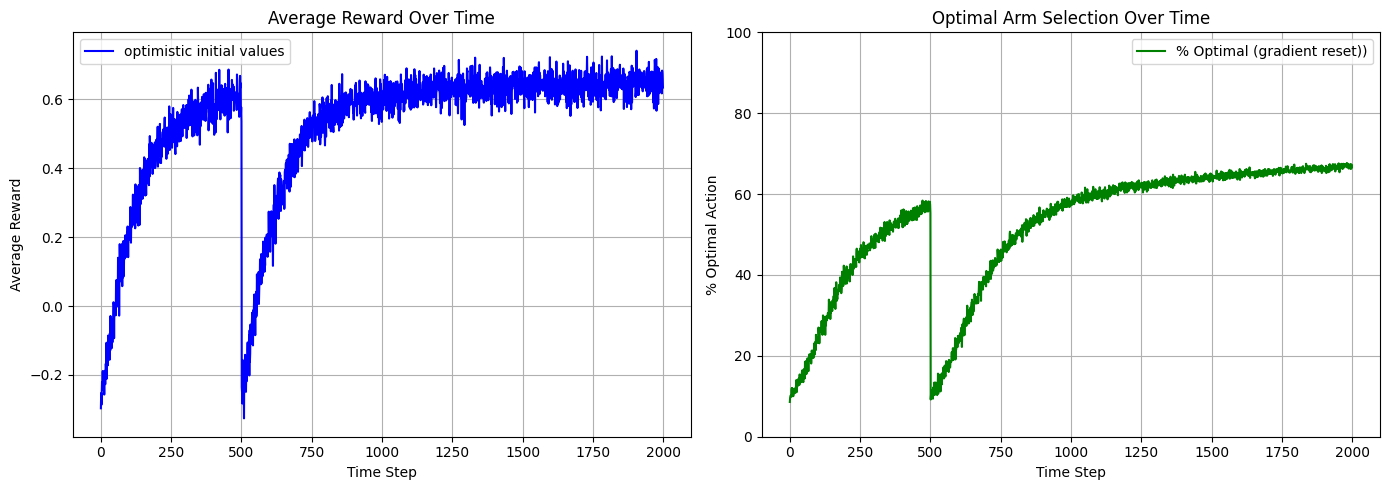

In [43]:
avg_reward_gradient_reset= rewards_gradient_reset.mean(axis=0)
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_reward_gradient_reset, label="optimistic initial values", color='blue')
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.title("Average Reward Over Time")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(percent_gradient_reset*100, label="% Optimal (gradient reset))", color='green')
plt.xlabel("Time Step")
plt.ylabel("% Optimal Action")
plt.title("Optimal Arm Selection Over Time")
plt.ylim(0, 100)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()